#### This notebook is created as submission for Assignment 02, Advanced Machine Learning
Submitted by: Ruchi Sharma 

### Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

##### Answer: 

1. Point estimators are defined as the functions that are used to find an approximate value of a population parameter from random samples of the population. The bias of a point estimator is defined as the difference between the expected value of the estimator and the value of the parameter being estimated. When the estimated value of the parameter and the value of the parameter being estimated are equal, the estimator is considered unbiased. 

2. Bias of a Model describes how well the particular model matches the training set. A model with high bias won't match the data set closely, while a model with low bias will match the data set very closely. Bias comes from models that are overly simple and fail to capture the trends present in the data set.

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

##### Answer 

Learning curves make it easy to visualize how the training and test error change w.r.t. model complexity. Learning curves help us in identifying whether adding additional training examples would improve the validation score (score on unseen data). 

Learning curve of a good fit model has a moderately high training loss at the beginning which gradually decreases upon adding training examples and flattens gradually, indicating addition of more training examples doesn’t improve the model performance on training data.

Learning curve of an overfit model has a very low training loss at the beginning which gradually increases very slightly upon adding training examples and doesn’t flatten.

Learning curve of an underfit model has a low training loss at the beginning which gradually increases upon adding training examples and suddenly falls to an arbitrary minimum point (minimum doesn’t mean zero loss) at the end. This sudden fall at the end may not always happen. 

### Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

##### Answer:

(a)

In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle = True)

In [2]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test = data_load.item().get("Ytest")
# x_all = np.linspace(-10,10,101).reshape(-1,1) 
x_all = np.linspace(-3.5, 3.5, 101).reshape(-1,1) # using this for better graph representation 

lrp = LinearRegression()

Train MSE for degree 2 = 247.29679797371534
Test MSE for degree 2 = 320.0640834697786 

Plot for Degree:  2


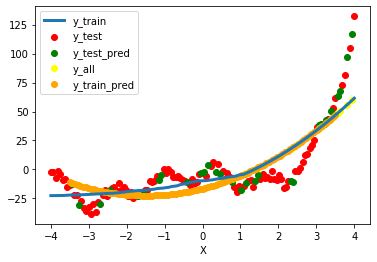

Train MSE for degree 4 = 31.72001805729004
Test MSE for degree 4 = 31.292082886606718 

Plot for Degree:  4


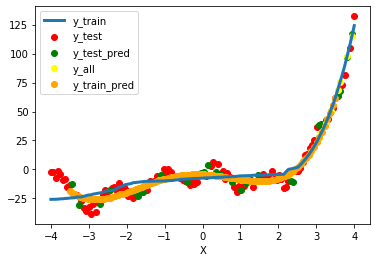

Train MSE for degree 7 = 30.677193592109738
Test MSE for degree 7 = 33.410694077690145 

Plot for Degree:  7


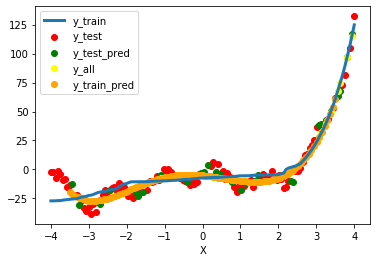

([247.29679797371534, 31.72001805729004, 30.677193592109738],
 [320.0640834697786, 31.292082886606718, 33.410694077690145])

In [3]:
def plot_curves(x_train, y_train, x_test, y_test):
    
    # Fit polynomial models of degrees 2, 4, 7 to the training data
    
    # Print out the mean squared error (on both train and test sets) for all the models
    
    # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models 
    # (predictions on x_all by different models vs x_all), 
    # and the predictions on the test set (predictions on x_test by different models vs x_test)

    deg_all = [2, 4, 7]
    arr1, arr2 = [], []
    
    mseTest, mseTrain = [], []
    
    for deg in deg_all:
        xTrain = np.vander(np.squeeze(x_train), deg+1)
        xTest = np.vander(np.squeeze(x_test), deg+1)
        xAll = np.vander(np.squeeze(x_all), deg+1)
        
        lrp.fit(xTrain, y_train)
        
        yTrain = lrp.predict(xTrain)
        yTest = lrp.predict(xTest)
        yAll = lrp.predict(xAll)
        
        print("Train MSE for degree", deg, "=", mean_squared_error(y_train, yTrain))
        print("Test MSE for degree", deg, "=", mean_squared_error(y_test, yTest), '\n')
        
        plt.scatter(x_train, y_train, label = 'Train', color = 'red')
        plt.scatter(x_test, y_test, label = 'Test', color = 'green')
        plt.scatter(x_test, yTest, label = "Prediction", color = 'yellow')
        plt.scatter(x_all, yAll, label = "X_All", color = 'orange')
        plt.xlabel('X')
        plt.plot(sorted(x_train), sorted(yTrain), label = 'Fitted Model', linewidth = 3)
    
        print("Plot for Degree: ", deg)
        plt.legend(['y_train', 'y_test', 'y_test_pred', 'y_all', 'y_train_pred'])
        plt.show()
        
        mseTrain.append(mean_squared_error(y_train, yTrain))
        mseTest.append(mean_squared_error(y_test, yTest))
        

    # return [0, 0, 0], [0, 0, 0]
    return mseTrain, mseTest

    
plot_curves(x_train, y_train, x_test, y_test)

(b)

Degree 4 polynomial performs the best on the test data as we can see lowest test_MSE is obtained for degree 4. Degree 7 performs similar to degree 4 in terms of train and test MSEs. But degree 2 performs the worst amongst all three. 

This can be explained by the bias-variance trade-off as degree increase (i.e. model become more complex), the train_MSE goes down but test_MSE goes down from degree 2 to 4 and then seems to go up from degree 4 to 7. As the model becomes more complex, the model bias decrease while variance increase, and the model tends to overfit. That's why we see that although Train_MSE decreases, but the Test_MSE increase while going from degree 4 to 7. While in the case of degree 2, the model is simples, thus more biased and prone to underfitting which explain very high value for both train and test MSEs. 

(c)

20% data
Train MSE for degree 2 = 161.17147378830043
Test MSE for degree 2 = 402.3231269099288 

Plot for Degree:  2


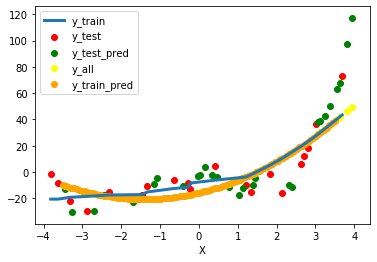

Train MSE for degree 4 = 35.1151131391298
Test MSE for degree 4 = 38.34074498344275 

Plot for Degree:  4


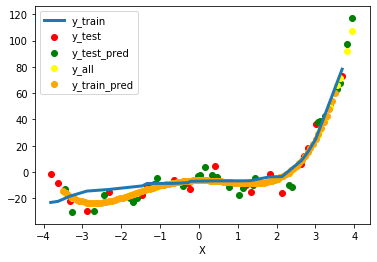

Train MSE for degree 7 = 22.543946691373325
Test MSE for degree 7 = 135.20764526756736 

Plot for Degree:  7


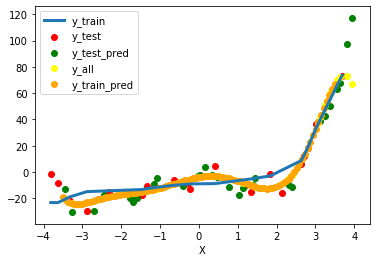

40% data
Train MSE for degree 2 = 150.33251286085704
Test MSE for degree 2 = 405.80516696165745 

Plot for Degree:  2


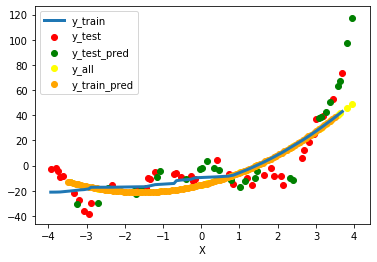

Train MSE for degree 4 = 31.6245296464469
Test MSE for degree 4 = 33.16428295918744 

Plot for Degree:  4


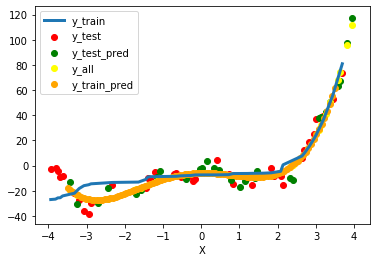

Train MSE for degree 7 = 25.492718751653634
Test MSE for degree 7 = 61.237418845510426 

Plot for Degree:  7


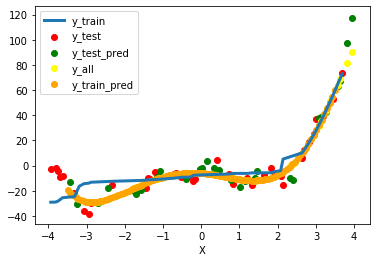

60% data
Train MSE for degree 2 = 150.08383759141728
Test MSE for degree 2 = 403.2513784833407 

Plot for Degree:  2


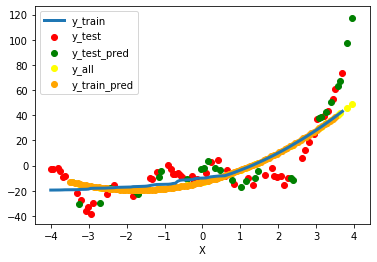

Train MSE for degree 4 = 29.1928057399479
Test MSE for degree 4 = 31.781415416196726 

Plot for Degree:  4


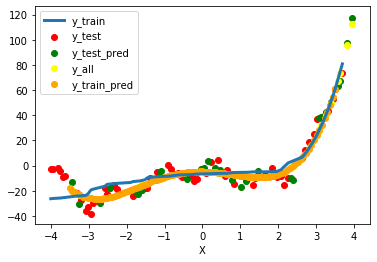

Train MSE for degree 7 = 26.099088642454408
Test MSE for degree 7 = 60.16667237664542 

Plot for Degree:  7


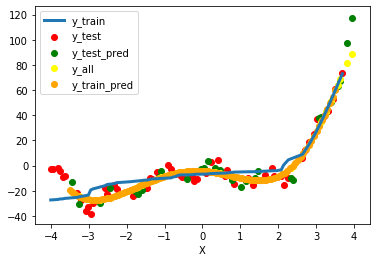

80% data
Train MSE for degree 2 = 168.1188246150281
Test MSE for degree 2 = 407.59369688184694 

Plot for Degree:  2


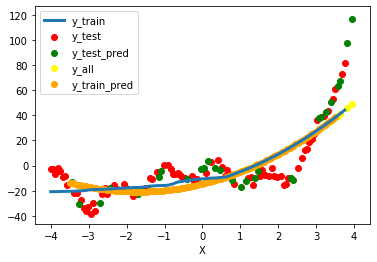

Train MSE for degree 4 = 29.305108483323444
Test MSE for degree 4 = 32.518106868742585 

Plot for Degree:  4


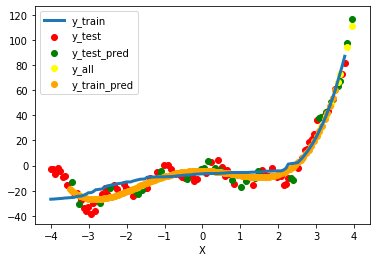

Train MSE for degree 7 = 26.549129596283638
Test MSE for degree 7 = 48.0769352971077 

Plot for Degree:  7


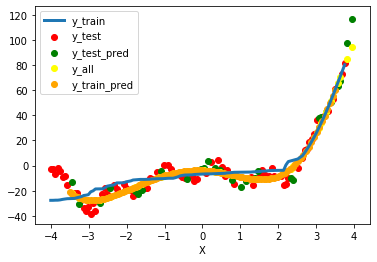

100% data
Train MSE for degree 2 = 247.29679797371534
Test MSE for degree 2 = 320.0640834697786 

Plot for Degree:  2


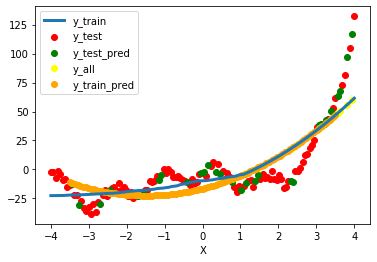

Train MSE for degree 4 = 31.72001805729004
Test MSE for degree 4 = 31.292082886606718 

Plot for Degree:  4


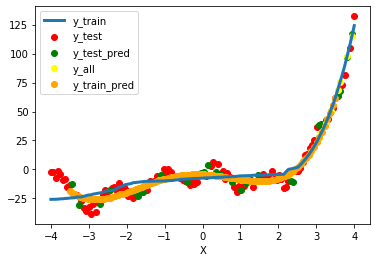

Train MSE for degree 7 = 30.677193592109738
Test MSE for degree 7 = 33.410694077690145 

Plot for Degree:  7


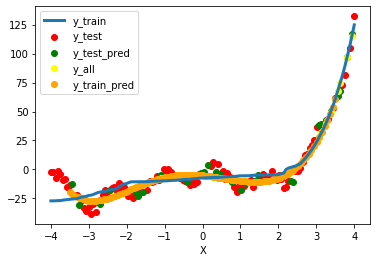

In [4]:
# Study the effects of the training data size on the bias and variance

r = []
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [5]:
train_rmses_20

[161.17147378830043, 35.1151131391298, 22.543946691373325]

In [6]:
from math import log

arr = [20, 40, 60, 80, 100]

df_train = pd.DataFrame([train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100], 
                        columns = ['Deg_2', 'Deg_4', 'Deg_7'])
df_test = pd.DataFrame([test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100], 
                      columns = ['Deg_2', 'Deg_4', 'Deg_7'])

df_train['Deg_2'] = df_train['Deg_2'].apply(np.log)
df_train['Deg_4'] = df_train['Deg_4'].apply(np.log)
df_train['Deg_7'] = df_train['Deg_7'].apply(np.log)

df_test['Deg_2'] = df_test['Deg_2'].apply(np.log)
df_test['Deg_4'] = df_test['Deg_4'].apply(np.log)
df_test['Deg_7'] = df_test['Deg_7'].apply(np.log)

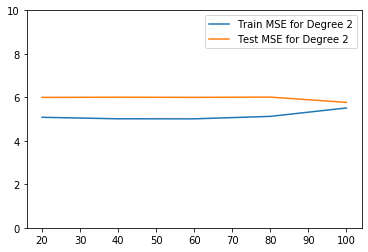

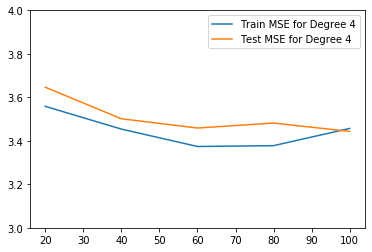

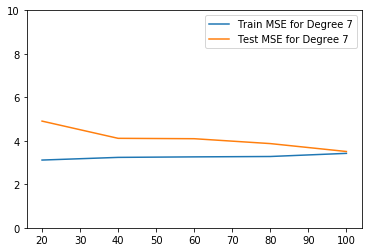

In [7]:
plt.plot(arr, df_train['Deg_2'], label = 'Train MSE for Degree 2')
plt.plot(arr, df_test['Deg_2'], label = 'Test MSE for Degree 2')
plt.legend(['Train MSE for Degree 2', 'Test MSE for Degree 2'], loc = 'upper right')
plt.ylim([0, 10])
plt.show()

plt.plot(arr, df_train['Deg_4'], label = 'Train MSE for Degree 4')
plt.plot(arr, df_test['Deg_4'], label = 'Test MSE for Degree 4')
plt.legend(['Train MSE for Degree 4', 'Test MSE for Degree 4'])
plt.ylim([3, 4])
plt.show()

plt.plot(arr, df_train['Deg_7'], label = 'Train MSE for Degree 7')
plt.plot(arr, df_test['Deg_7'], label = 'Test MSE for Degree 7')
plt.legend(['Train MSE for Degree 7', 'Test MSE for Degree 7'])
plt.ylim([0, 10])
plt.show()

We can observe from the above plots, that with increasing size of data set, training error reduces as expected and the test error shows different patterns across the different model complexities. As data size increases, we see that degree 4 test error tends to increase, that could be because the model underfits huge data or there's noise in the data itself. 

### Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

We can note that standard procedure for gradient descent tends to overshoot regions which aren't scaled properly, more formally called as pathological curvatures. In such situation, there's a need to approach the optimum in small steps. Progress along certain direction tends to zero and in these regions, gradient descent would fumble. Instead, by using exponetially weighted average (dw and db) values, we tend to average the oscillations in the vertical direction closer to zero as they are in both (positive & negative) directions. Momentum enables our algorithm to take a straighter forward path to local optima and to damp out vertical oscillations. Because of this the algorithm will end up with a few iterations at local optima.

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 

Advantages:
1. The model update frequency is higher than BGD: In MGD, we are not waiting for entire data, we are just passing 50 records or 200 or 100 or 256, then we are passing for optimization.
2. The batching allows both efficiency of not having all training data in memory and algorithms implementations. We are controlling memory consumption as well to store losses for each and every datasets.
3. The batches updates provide a computationally more efficient process than SGD.

### Question 4: Stochastic Gradient Descent (30 pts)


(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Derive SDG expression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [10]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
        # initialize whichever variables you would need here
        
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient
        # = please put your codes here to update the self.coef using SGD
    
    def fit(self, X, y, update_rule = 'sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                
                # Compute error
        
                error = y[i] - np.matmul(X[i], self.coef.T)

                # Compute gradients
                
                temp = self.coef.copy()
                temp[0] = 0
                
                gradient = error*X[i] + 2*self.regularization*temp
               
                # Update weights
                self.sgd(-gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]
        x[:,2] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        return np.dot(X, self.coef)

In [11]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

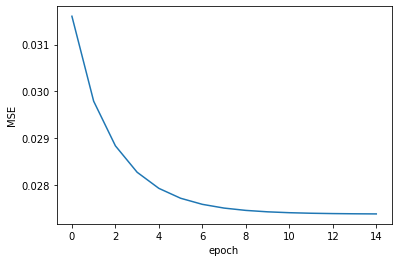

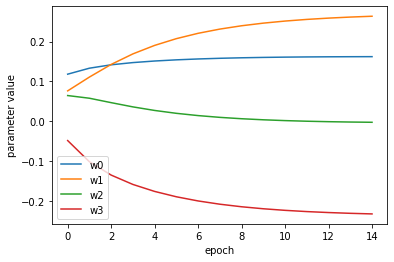

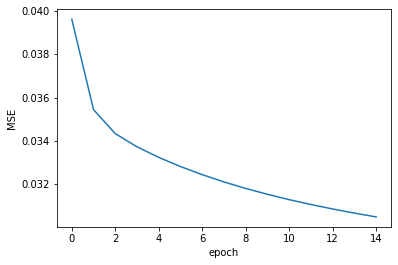

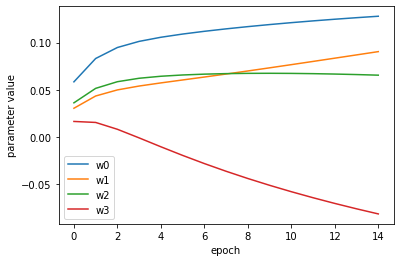

In [12]:
from operator import itemgetter
import warnings
warnings.filterwarnings("ignore")

params = []

for r in learning_rate:
    for re in regularization:
        regr = Regression(r, re, 15)
        regr.fit(X, y, plot = False)
        params.append((r, re, regr.lowest_mse))
        
params.sort(key = itemgetter(2))

regr_2 = Regression(params[0][0], params[0][1], 15)
regr_2.fit(X, y, plot = True)

regr_3 = Regression(params[1][0], params[1][1], 15)
regr_3.fit(X, y, plot = True)

In [13]:
for i in [0, 1]:
    print("Best param", i+1, "for Lowest MSE:", params[i][2], "\n Learning rate:", params[i][0], '\n reg param:', params[0][1])

Best param 1 for Lowest MSE: 0.027391087575201013 
 Learning rate: 0.01 
 reg param: 0
Best param 2 for Lowest MSE: 0.03049599152007353 
 Learning rate: 0.001 
 reg param: 0
